In [1]:
%load_ext autoreload
%autoreload 2

import random, time
import matplotlib.pyplot as plt
from pair import *

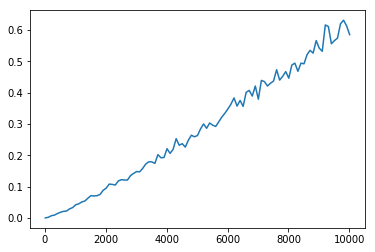

In [80]:
# plotting that tests the running time of two algos
random.seed(209523948)
M = 10
times = []
for n in range(10, 10100, 100):
    points = [(random.random()*M, random.random()*M) for _ in range(n)]
    points.sort(key=lambda x: x[0])  # sorted by x-coord
    clusters = create_dummy_clusters(points)

    stime = time.time()
    min_dist, pu, pv = fast_closest_pair(clusters)
    etime = time.time()
    elapse = etime - stime
    times.append(elapse)

plt.plot(range(10, 10100, 100), times)

In [81]:
# random data test for fast algo
random.seed(23234)
M = 10
for n in range(20, 520, 20):
    points = [(random.random()*M, random.random()*M) for _ in range(n)]
    points.sort(key=lambda x: x[0])  # sorted by x-coord
    clusters = create_dummy_clusters(points)
    res_slow = slow_closest_pair(clusters)
    res_fast = fast_closest_pair(clusters)
    assert abs(res_slow[0] - res_fast[0]) <= 1e-4


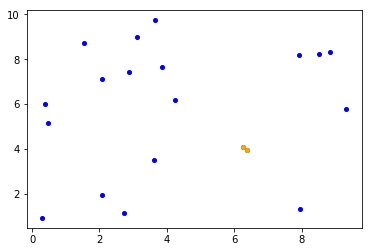

In [82]:
# plotting that test between fast and slow algo for correctness
random.seed(6865415)
M = 10
points = [
    (0.29530068838606094, 0.9261429782205743),
    (0.39694682143442295, 6.006096517635459),
    (0.4651737147285573, 5.150845815349867),
    (1.5391937098671338, 8.714047930449029),
    (2.0627536165444518, 7.11938520658291),
    (2.0679245670402455, 1.944518661157295),
    (2.742436500077876, 1.1612941030922752),
    (2.8723056658340997, 7.42778956574465),
    (3.1202752545820944, 8.972076628242203),
    (3.6170884147014695, 3.50390822802939),
    (3.662125747342589, 9.739789659582339),
    (3.8655241851318323, 7.648735478658644),
    (4.234446593439591, 6.188983797973931),
    (6.2734163048355995, 4.088428291836864),
    (6.3664307300777185, 3.9659181136697716),
    (7.915386882372797, 8.187903775211087),
    (7.93983239260807, 1.3033871104915506),
    (8.514814357027534, 8.231756712429245),
    (8.833212263099961, 8.33792402677629),
    (9.331759888717958, 5.761495413919164)
]
clusters = create_dummy_clusters(points)

plt.plot(
    map(lambda x: x.horiz_center(), clusters), map(lambda x: x.vert_center(), clusters),
    marker='.', linestyle='', markersize=8, color='b'
)

# dist, idx_u, idx_v = slow_closest_pair(clusters)
dist, idx_u, idx_v = fast_closest_pair(clusters)
plt.plot(
    [clusters[idx_u].horiz_center(), clusters[idx_v].horiz_center()],
    [clusters[idx_u].vert_center(), clusters[idx_v].vert_center()],
    marker='.', linestyle='', markersize=8, color='orange'
)


[alg_cluster.Cluster(set([3]), 2.0, 1.0, 10, 10.0), alg_cluster.Cluster(set([0, 1, 2, 4, 5]), 1.74, 5.64, 50, 10.0), alg_cluster.Cluster(set([6]), 5.0, 2.0, 10, 10.0), alg_cluster.Cluster(set([8, 9, 10, 7]), 5.5, 4.5, 40, 10.0)]


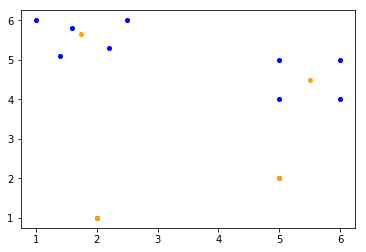

In [19]:
import matplotlib.pyplot as plt

ps = [(1,6),(1.4,5.1),(1.6,5.8),(2,1),(2.2,5.3),(2.5,6),(5,2),(5,4),(5,5),(6,4),(6,5)]
clusters = create_dummy_clusters(ps)
plt.plot(
    map(lambda x: x.horiz_center(), clusters), map(lambda x: x.vert_center(), clusters),
    marker='.', linestyle='', markersize=8, color='b'
)
clusters = kmeans_clustering(clusters, 4, 1)
plt.plot(
    map(lambda x: x.horiz_center(), clusters), map(lambda x: x.vert_center(), clusters),
    marker='.', linestyle='', markersize=8, color='orange'
)
print clusters

In [34]:
from alg_cluster import Cluster
from test_pair import load_data_table, set_of_county_tuples


_data = load_data_table(r'data/unifiedCancerData_24.csv')
_data = [Cluster(set([d[0]]), *d[1:]) for d in _data]
data = {
    'data': _data,
    'expected': [
        # ['cancer_24', 15, 1, set([('34017', '36061'), ('06037',), ('06059',), ('36047',), ('36081',), ('06071', '08031'), ('36059',), ('36005',), ('55079',), ('34013', '34039'), ('06075',), ('01073',), ('06029',), ('41051', '41067'), ('11001', '24510', '51013', '51760', '51840', '54009')])], 
        # ['cancer_24', 15, 3, set([('34017', '36061'), ('06037', '06059'), ('06071',), ('36047',), ('36081',), ('08031',), ('36059',), ('36005',), ('55079',), ('34013', '34039'), ('06075',), ('01073',), ('06029',), ('41051', '41067'), ('11001', '24510', '51013', '51760', '51840', '54009')])],
        # ['cancer_24', 15, 5, set([('34017', '36061'), ('06037', '06059'), ('06071',), ('36047',), ('36081',), ('08031',), ('36059',), ('36005',), ('55079',), ('34013', '34039'), ('06075',), ('01073',), ('06029',), ('41051', '41067'), ('11001', '24510', '51013', '51760', '51840', '54009')])],
        # ['cancer_24', 10, 1, set([('34017', '36061'), ('06029', '06037', '06075'), ('11001', '24510', '34013', '34039', '51013', '51760', '51840', '54009'), ('06059',), ('36047',), ('36081',), ('06071', '08031', '41051', '41067'), ('36059',), ('36005',), ('01073', '55079')])],
        # ['cancer_24', 10, 3, set([('34013', '34017', '36061'), ('06029', '06037', '06075'), ('08031', '41051', '41067'), ('06059', '06071'), ('34039', '36047'), ('36081',), ('36059',), ('36005',), ('01073', '55079'), ('11001', '24510', '51013', '51760', '51840', '54009')])],
        # ['cancer_24', 10, 5, set([('34013', '34017', '36061'), ('06029', '06037', '06075'), ('08031', '41051', '41067'), ('06059', '06071'), ('34039', '36047'), ('36081',), ('36059',), ('36005',), ('01073', '55079'), ('11001', '24510', '51013', '51760', '51840', '54009')])],
        ['cancer_24', 5, 1, set([('06029', '06037', '06075'), ('01073', '11001', '24510', '34013', '34017', '34039', '36047', '51013', '51760', '51840', '54009', '55079'), ('06059',), ('36005', '36059', '36061', '36081'), ('06071', '08031', '41051', '41067')])],
        # ['cancer_24', 5, 3, set([('06029', '06037', '06075'), ('11001', '24510', '34013', '34017', '34039', '36005', '36047', '36059', '36061', '36081', '51013'), ('08031', '41051', '41067'), ('06059', '06071'), ('01073', '51760', '51840', '54009', '55079')])],
        # ['cancer_24', 5, 5, set([('06029', '06037', '06075'), ('08031', '41051', '41067'), ('06059', '06071'), ('01073', '55079'), ('11001', '24510', '34013', '34017', '34039', '36005', '36047', '36059', '36061', '36081', '51013', '51760', '51840', '54009')])],
    ],
}

clusters = data['data']
for _, k, niter, expected in data['expected']:
    # no mutate on original list
    copy_clusters = [c.copy() for c in clusters]
    kmeans = kmeans_clustering(copy_clusters, k, niter)
    try:
        assert set_of_county_tuples(kmeans) == expected
    except:
        print set_of_county_tuples(kmeans)
        print k, niter
        print expected
        break

set([('01073', '11001', '24510', '51013', '51760', '51840', '54009', '55079'), ('06029', '06037', '06059', '06071', '06075'), ('08031',), ('34013', '34017', '34039', '36005', '36047', '36059', '36061', '36081'), ('41051', '41067')])
5 1
set([('36005', '36059', '36061', '36081'), ('06059',), ('06029', '06037', '06075'), ('06071', '08031', '41051', '41067'), ('01073', '11001', '24510', '34013', '34017', '34039', '36047', '51013', '51760', '51840', '54009', '55079')])
